## 0 - Introduction

Welcome to the <span style="color:yellowgreen">Foundations of Machine Learning</span> (ECE5984_41) course!

This is the <span style="color:red">4th</span> lab practice. From now on, you will going to implement PCA, t-SNE

## 1. Packages 

You have to install and use below packages for HW#4.
- [numpy](https://www.numpy.org): Fundamental package for matrix computation with python.
- [matplotlib](https://matplotlib.org): Package for visualization of the graph with python.
- [scikit-learn](https://scikit-learn.org/stable/):  Python module for machine learning built on top of SciPy

**Do not use other machine learning packages in this homework, e.g., *tensorflow*, *pytorch*, *jax*, etc.<br/>**
**And partial use of scikit-learn is permitted.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets

# 2. PCA(Principle Component Analysis)

### 2.1. Load iris dataset

In [2]:
def load_iris_dataset():
    # import data
    iris = skdatasets.load_iris()
    # only take the first two features
    X = iris.data[:, :2]
    y = iris.target
    return X, y

### 2.2. Implement a function for PCA (Principal Component Analysis).

In [3]:
# Compute the covariance matrix
def compute_covariance_matrix(X):
    return np.cov(X.T)

# Select top k eigenvectors
def select_top_k_eigenvectors(eigenvectors, k):
    return eigenvectors[:, :k]

# Sort eigenvalues and eigenvectors
def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    ###################################################################################
    # TODO: Implement the Sort eigenvalues and eigenvectors function using numpy      #
    ###################################################################################
    # ************* START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* # 

    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[i,:]) for i in range(len(eigenvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    sorted_eigenvalues = np.array([x[0] for x in eig_pairs])
    sorted_eigenvectors = np.array([x[1] for x in eig_pairs])

    # ************* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* #
    return sorted_eigenvalues, sorted_eigenvectors

# Standardize the dataset
def standardize_data(X):
    #########################################################################
    # TODO: Implement the Standardize the dataset function using numpy      #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #
    
    mean = np.mean(X, axis=0)
    scale = np.std(X, axis=0)
    X_standardized = (X - mean) / scale

    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    return X_standardized

# Compute eigenvalues and eigenvectors
def compute_eigenvalues_and_eigenvectors(X):
    ######################################################################################
    # TODO: Implement the Compute eigenvalues and eigenvectors function using numpy      #
    ######################################################################################
    # ************** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) *************** #          

    eigenvalues, eigenvectors = np.linalg.eig(X)
    
    # ************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) *************** #
    return eigenvalues, eigenvectors

# Transform the data
def transform_data(X, eigenvectors):
    ################################################################
    # TODO: Implement the transform data function using numpy      #
    ################################################################
    # **** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) **** # 

    X_transformed = X.dot(eigenvectors.T)

    # ***** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ***** #
    return X_transformed

### 2.3. Implement PCA & Explained variance

In [4]:
def My_PCA(X, components=2):
    ##########################################################################
    # TODO: Implement PCA using the function implemented in section 2.2      #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

    # 0. standardize the data (standardize_data) (checked)
    X_std = standardize_data(X=X) 

    # 1. obtain covariance matrix (compute_covariance_matrix)
    covariance_matrix = compute_covariance_matrix(X=X_std) 

    # 2. find eigenvalues and thier corresponding eigenvectors of the covariance matrix (compute_eigenvalues_and_eigenvectors)
    eigen_values, eigen_vectors = compute_eigenvalues_and_eigenvectors(X=covariance_matrix)

    # 3. rearrange the eigenvectors and eigenvalues (sort_eigenvalues_and_eigenvectors)
    sorted_eigen_values, sorted_eigen_vectors = sort_eigenvalues_and_eigenvectors(eigenvalues=eigen_values, eigenvectors=eigen_vectors)

    # 4. choose principal components (select_top_k_eigenvectors)
    top_k_eigenvectors = select_top_k_eigenvectors(eigenvectors=sorted_eigen_vectors, k=components)

    # 5. project the data or transform data using the projection matrix 
    # vector - matrix multiplication between X and W.T 
    X_pca = transform_data(X=X_std, eigenvectors=top_k_eigenvectors)
    
    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #    
    
    return X_pca
    

### 2.4 Do PCA & Visulaize the result

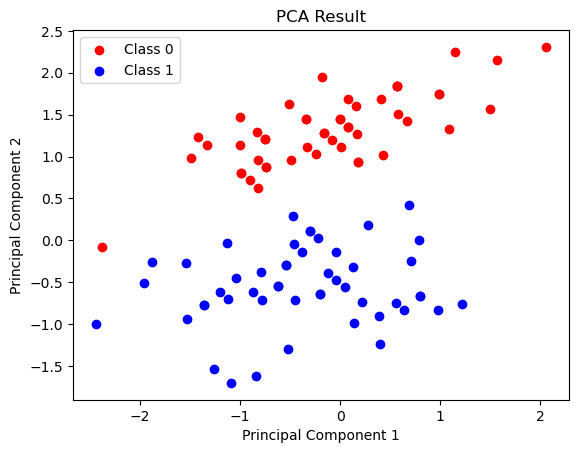

In [5]:
X, y = load_iris_dataset()
X_pca = My_PCA(X, components=3)

def visualize_PCA_result(X_transformed, y):
    # Use different colors for different classes
    colors = ['r', 'b']
    for i in range(len(colors)):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=colors[i], label=f'Class {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.legend()
    plt.show()

visualize_PCA_result(X_pca, y)

# 3. t-SNE

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3.1 data load

In [7]:
# import the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

## 3.2 Apply PCA & t-SNE using scikit-learn

In [8]:
# Apply PCA
def pca(X, n_componets=2):
    ##########################################################################
    # TODO: Apply PCA using sckit-learn                                      #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    X_std = standardize_data(X=X)
    model = PCA(n_components=n_componets)
    X_PCA = model.fit_transform(X_std)
    
    # ******** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #
    
    return X_PCA

# Apply t-SNE
def t_sne(X, n_componets=2):
    ##########################################################################
    # TODO: Apply t-SNE using sckit-learn                                    #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    X_std = standardize_data(X=X)
    model= TSNE(n_components=n_componets)
    X_tsne = model.fit_transform(X_std)
    # ******** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #

    return X_tsne

### 3.3 Visulaize the results

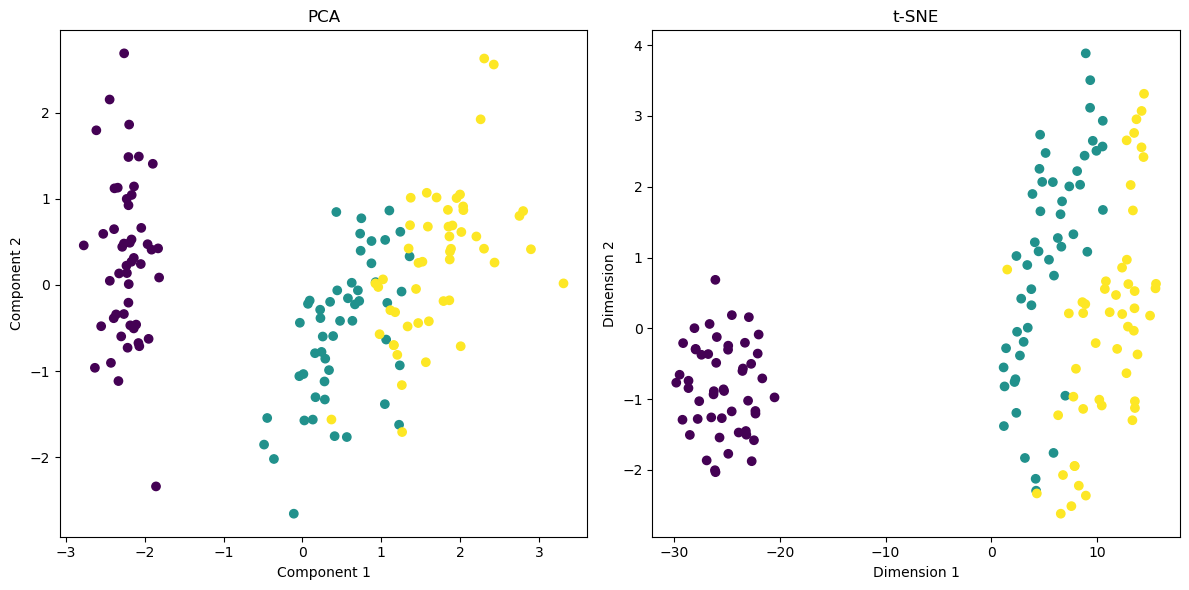

In [9]:
# Apply PCA
X_PCA = pca(X, n_componets=2)

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Apply t-SNE
X_tsne = t_sne(X, n_componets=2)

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()